In [37]:
listings=pd.read_csv("D:\AccioJob\Data Analytics poject\Airbnb Market Analytics\Original Data\Listings.csv",encoding="ISO-8859-1",low_memory=False)
reviews=pd.read_csv("D:\AccioJob\Data Analytics poject\Airbnb Market Analytics\Original Data\Reviews.csv",encoding="ISO-8859-1",low_memory=False)

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [39]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [40]:
listings.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [41]:
reviews.describe()


,listing_id,review_id,reviewer_id
count,5.373143e+06,5.373143e+06,5.373143e+06
mean,1.602989e+07,3.486753e+08,9.808133e+07
std,1.198676e+07,2.061019e+08,9.080596e+07
min,2.577000e+03,2.820000e+02,1.000000e+00
25%,5.332708e+06,1.666435e+08,2.390206e+07
50%,1.450814e+07,3.425727e+08,6.697814e+07
75%,2.414496e+07,5.334045e+08,1.528936e+08
max,4.826387e+07,7.356237e+08,3.903385e+08


In [42]:
reviews.describe()

,listing_id,review_id,reviewer_id
count,5.373143e+06,5.373143e+06,5.373143e+06
mean,1.602989e+07,3.486753e+08,9.808133e+07
std,1.198676e+07,2.061019e+08,9.080596e+07
min,2.577000e+03,2.820000e+02,1.000000e+00
25%,5.332708e+06,1.666435e+08,2.390206e+07
50%,1.450814e+07,3.425727e+08,6.697814e+07
75%,2.414496e+07,5.334045e+08,1.528936e+08
max,4.826387e+07,7.356237e+08,3.903385e+08


In [43]:
listings.isnull().sum()

listing_id                          0
name                              175
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

In [44]:
listings.tail()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,13-04-2015,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,27-11-2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,27-04-2012,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,16-07-2015,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279711,40219504,Cosy apartment with view on Canal St Martin,6955618,17-06-2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [45]:
listings["review_scores_rating"] = listings["review_scores_rating"].fillna(listings["review_scores_rating"].median())

In [46]:
""" 
# Columns to DROP (not useful / too missing)

We will drop:

host_location (not precise, messy)

host_response_time (missing 50%+)

host_response_rate (missing 50%+)

host_acceptance_rate (missing 50%+)

district (almost completely missing 242,700)

review_scores_* subcategories (because overall rating exists)
"""

' \n# Columns to DROP (not useful / too missing)\n\nWe will drop:\n\nhost_location (not precise, messy)\n\nhost_response_time (missing 50%+)\n\nhost_response_rate (missing 50%+)\n\nhost_acceptance_rate (missing 50%+)\n\ndistrict (almost completely missing 242,700)\n\nreview_scores_* subcategories (because overall rating exists)\n'

In [47]:
drop_cols = [
    "host_location",
    "host_response_time",
    "host_response_rate",
    "host_acceptance_rate",
    "district",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"
]
listings= listings.drop(columns=[c for c in drop_cols if c in listings.columns])

In [48]:
listings["price"].max()

625216

In [49]:
listings["bedrooms"].max()

50.0

In [50]:
listings["bedrooms"] = listings["bedrooms"].fillna(np.ceil(listings["accommodates"] / 2))

In [51]:
listings["review_scores_rating"].fillna(listings["review_scores_rating"].mean())

0         100.0
1         100.0
2         100.0
3         100.0
4         100.0
          ...  
279707    100.0
279708    100.0
279709    100.0
279710    100.0
279711    100.0
Name: review_scores_rating, Length: 279712, dtype: float64

In [52]:
listings.isnull().sum()

listing_id                     0
name                         175
host_id                        0
host_since                   165
host_is_superhost            165
host_total_listings_count    165
host_has_profile_pic         165
host_identity_verified       165
neighbourhood                  0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
instant_bookable               0
dtype: int64

In [53]:
listings['host_since'] = pd.to_datetime(listings['host_since'], errors='coerce')
earliest_date = listings['host_since'].min()
listings['host_since'] = listings['host_since'].fillna(earliest_date)

In [56]:
listings.isnull().sum()

listing_id                     0
name                         175
host_id                        0
host_since                     0
host_is_superhost            165
host_total_listings_count    165
host_has_profile_pic         165
host_identity_verified       165
neighbourhood                  0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
instant_bookable               0
dtype: int64

In [58]:
listings["host_is_superhost"] = listings["host_is_superhost"].map({"t": True, "f": False})

listings["host_identity_verified"] = listings["host_identity_verified"].map({"t": True, "f": False})

listings["host_total_listings_count"] = listings["host_total_listings_count"].fillna(0)

In [59]:
listings["amenity_count"] = listings["amenities"].apply(lambda x: len(str(x).split(",")))

In [61]:
# Estimated yearly revenue proxy
listings["estimated_yearly_revenue"] =listings["price"] * listings["minimum_nights"] * 12

In [62]:
# Pro host flag
listings["is_pro_host"] = listings["host_total_listings_count"] > 5

In [64]:
listings.to_csv("listings_clean_final.csv", index=False)

In [65]:
reviews.isnull().sum()

listing_id     0
review_id      0
date           0
reviewer_id    0
dtype: int64

In [80]:
#Exploratory Data Analysis (EDA)

listings.describe()

,listing_id,host_id,host_since,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,amenity_count,estimated_yearly_revenue
count,2.797120e+05,2.797120e+05,279712,279712.000000,279712.000000,279712.000000,279712.000000,279712.000000,279712.000000,279712.000000,2.797120e+05,279712.000000,279712.000000,2.797120e+05
mean,2.638196e+07,1.081658e+08,2011-08-27 19:24:04.468596480,24.567112,18.761862,12.595075,3.288736,1.489818,608.792737,8.050967,2.755860e+04,94.253132,19.563337,6.707459e+04
min,2.577000e+03,1.822000e+03,2008-07-09 00:00:00,0.000000,-34.264400,-99.339630,0.000000,0.000000,0.000000,1.000000,1.000000e+00,20.000000,1.000000,0.000000e+00
25%,1.384462e+07,1.720656e+07,2008-07-09 00:00:00,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,94.000000,13.000000,2.100000e+03
50%,2.767098e+07,5.826911e+07,2008-07-09 00:00:00,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,18.000000,6.000000e+03
75%,3.978485e+07,1.832853e+08,2015-06-01 00:00:00,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,98.000000,26.000000,2.160000e+04
max,4.834353e+07,3.901874e+08,2021-12-02 00:00:00,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,89.000000,1.314000e+09
std,1.442576e+07,1.108570e+08,NaN,283.957981,32.560343,73.081309,2.133379,1.111508,3441.826611,31.518946,7.282875e+06,8.351922,9.257622,3.166868e+06


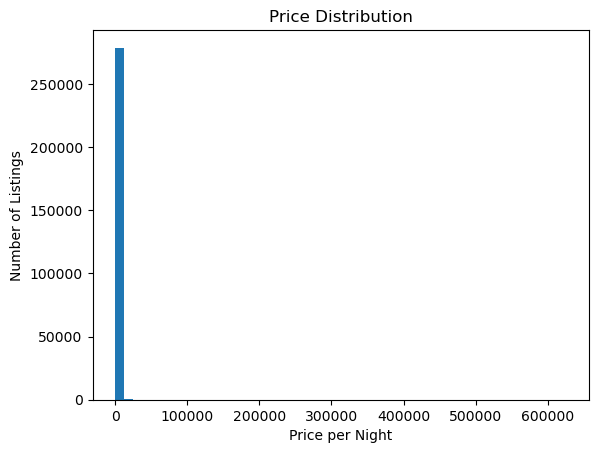

In [81]:
# PRICE DISTRIBUTION

plt.hist(listings["price"], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price per Night")
plt.ylabel("Number of Listings")
plt.show()

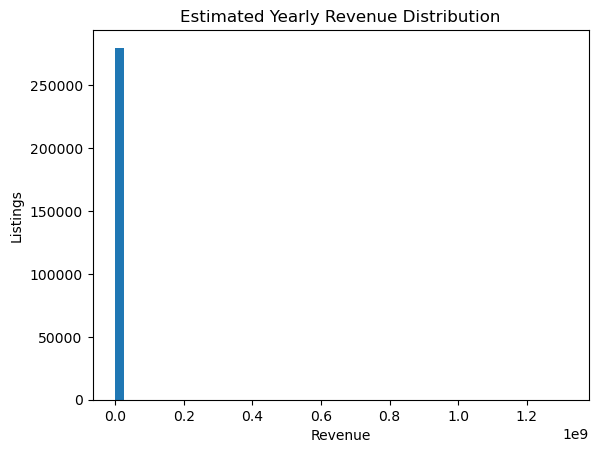

In [82]:
# REVENUE DISTRIBUTION

plt.hist(listings["estimated_yearly_revenue"], bins=50)
plt.title("Estimated Yearly Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Listings")
plt.show()

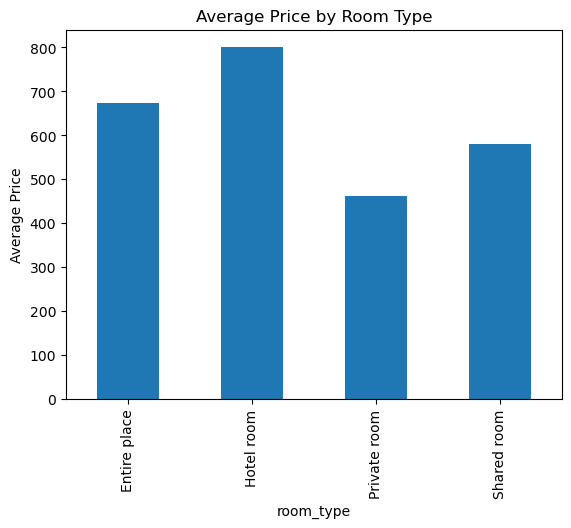

In [84]:
# PRICE BY ROOM TYPE

listings.groupby("room_type")["price"].mean().plot(kind="bar")
plt.title("Average Price by Room Type")
plt.ylabel("Average Price")
plt.show()

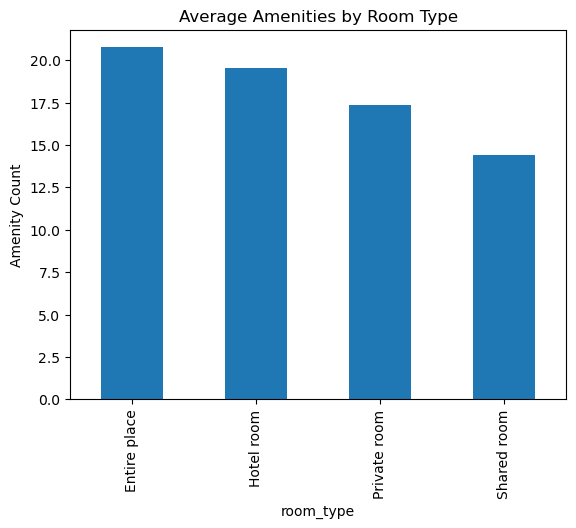

In [85]:
# IMPACT OF AMENITIES

listings.groupby("room_type")["amenity_count"].mean().plot(kind="bar")
plt.title("Average Amenities by Room Type")
plt.ylabel("Amenity Count")
plt.show()

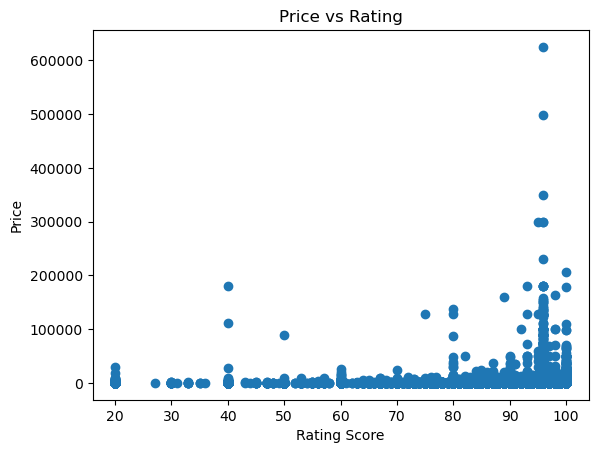

In [86]:
# PRICE VS RATING

plt.scatter(listings["review_scores_rating"], listings["price"])
plt.title("Price vs Rating")
plt.xlabel("Rating Score")
plt.ylabel("Price")
plt.show()

In [87]:
# REVENUE BY NEIGHBOURHOOD

top_rev = (
    listings.groupby("neighbourhood")["estimated_yearly_revenue"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

In [78]:
print("\nTop 10 most profitable neighbourhoods:")
print(top_rev)


Top 10 most profitable neighbourhoods:
neighbourhood
Bang Rak       1.529345e+06
Thung khru     1.403597e+06
Yan na wa      1.240816e+06
Ward 62        1.130409e+06
Ward 44        9.071200e+05
Khan Na Yao    9.057656e+05
Din Daeng      8.905803e+05
Khlong San     7.534689e+05
Realengo       6.897467e+05
Lat Phrao      6.070064e+05
Name: estimated_yearly_revenue, dtype: float64


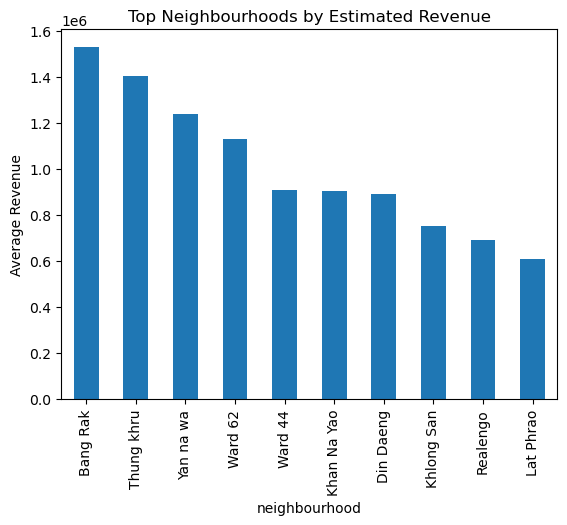

In [88]:
top_rev.plot(kind="bar")
plt.title("Top Neighbourhoods by Estimated Revenue")
plt.ylabel("Average Revenue")
plt.show()

In [89]:
listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'instant_bookable', 'amenity_count',
       'estimated_yearly_revenue', 'is_pro_host'],
      dtype='object')

In [91]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   listing_id                 279712 non-null  int64         
 1   name                       279537 non-null  object        
 2   host_id                    279712 non-null  int64         
 3   host_since                 279712 non-null  datetime64[ns]
 4   host_is_superhost          279547 non-null  object        
 5   host_total_listings_count  279712 non-null  float64       
 6   host_has_profile_pic       279547 non-null  object        
 7   host_identity_verified     279547 non-null  object        
 8   neighbourhood              279712 non-null  object        
 9   city                       279712 non-null  object        
 10  latitude                   279712 non-null  float64       
 11  longitude                  279712 non-null  float64 

In [92]:
pip install sqlalchemy pymysql pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [93]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

username = "root"
password = "root"
host = "localhost"
database = "airbnb"

encoded_password = quote_plus(password)

engine = create_engine(f"mysql+pymysql://{username}:{encoded_password}@{host}/{database}")

In [94]:
import pandas as pd

# Dump to MySQL
listings.to_sql(
    name="listings",
    con=engine,
    if_exists="replace",   
    index=False,
    chunksize=5000
)

print("Listings table uploaded successfully")


Listings table uploaded successfully


In [95]:
reviews.to_sql(
    name="reviews",
    con=engine,
    if_exists="replace",
    index=False,
    chunksize=5000
)

print("Reviews table uploaded successfully")


Reviews table uploaded successfully
